# Linear Regression with Python

** This is mostly just code for reference. Please watch the video lecture for more info behind all of this code.**

Your neighbor is a real estate agent and wants some help predicting housing prices for regions in the USA. It would be great if you could somehow create a model for her that allows her to put in a few features of a house and returns back an estimate of what the house would sell for.

She has asked you if you could help her out with your new data science skills. You say yes, and decide that Linear Regression might be a good path to solve this problem!

Your neighbor then gives you some information about a bunch of houses in regions of the United States,it is all in the data set: USA_Housing.csv.

The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

**Let's get started!**
## Check out the data
We've been able to get some data from your neighbor for housing prices as a csv set, let's get our environment ready with the libraries we'll need and then import the data!
### Import Libraries

In [87]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [99]:
import warnings
warnings.filterwarnings("ignore")

### Check out the Data

In [88]:
#import the data
USAhousing = pd.read_csv('USA_Housing.csv')

In [89]:
#top 5 rows
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [90]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [91]:
#stats values of dataset
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


from above description we can check how much each features spread, what is the max and min values of features means we check the data is imbalanced or not. Exp in the area population we can analyse that the min population is 172 and max is 69621 and mostly population of particular area is around is 9925. 

In [92]:
#features of dataset
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# EDA
in this part we analyse the data and find insights of datasets by ploting the data using matplotlib and seaborn libraries.

Let's create some simple plots to check out the data!

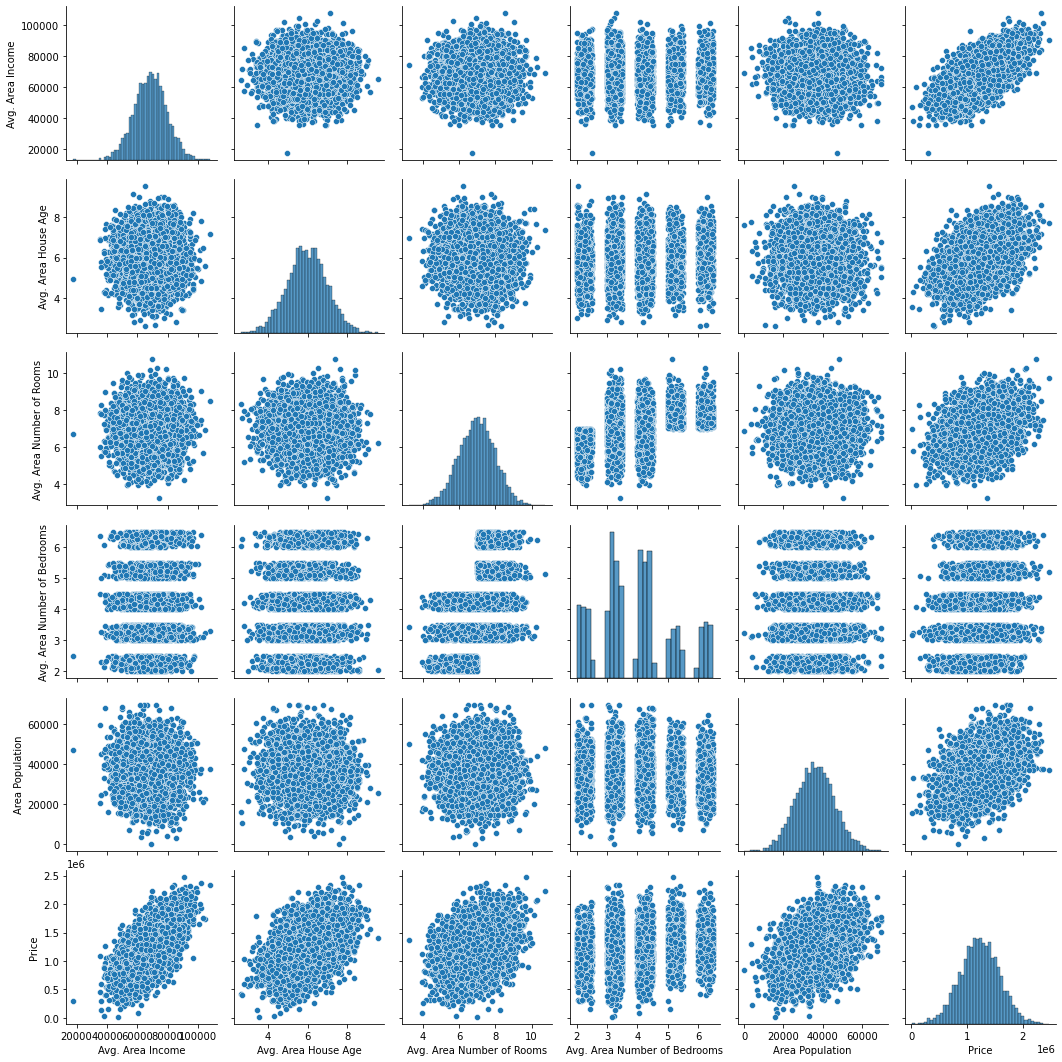

In [93]:
sns.pairplot(USAhousing)

this plot tell us the distribution of single variables and relationship between two variables. Here we can analyze that the as mostly price is depend on area population. We can also see that all the features are normal distributed except Avg. Area number of Bedrooms.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


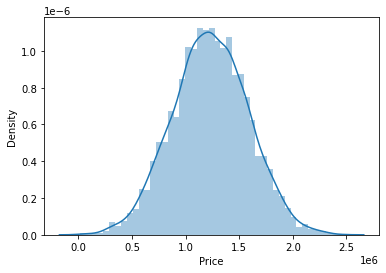

In [94]:
sns.distplot(USAhousing['Price'])

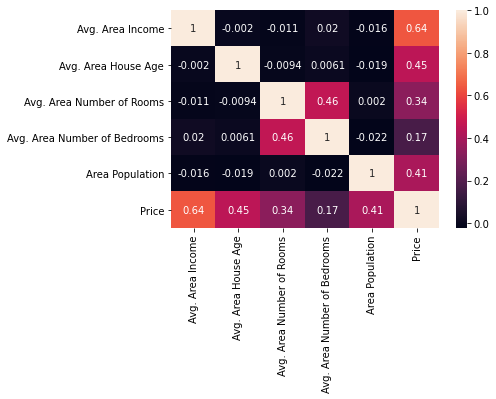

In [95]:
#check correlation
sns.heatmap(USAhousing.corr(), annot=True)

Price has strong correlation with Avg Area income and less relationship with Average Area Number of Bedrooms.Well, there is no negative correlation. Every feature of this dataset are inportant. 

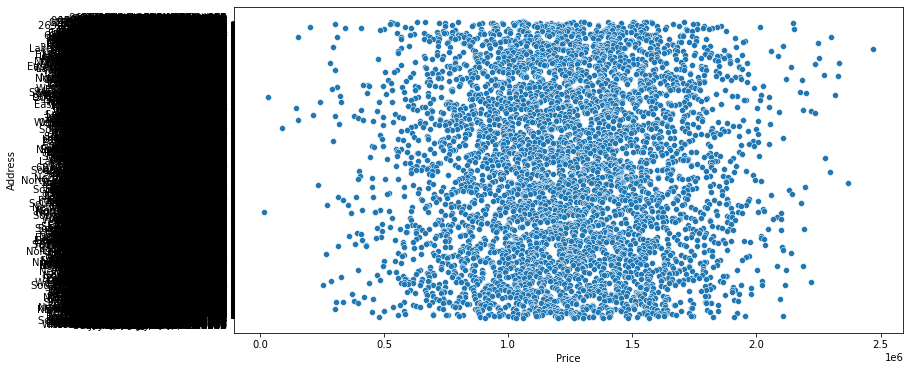

In [96]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Price',y='Address', data=USAhousing)

Well, we can analyse that address doesn't impact on our target price. So we can drop this features in fitting our model.

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [97]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [98]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Creating and Training the Model

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [30]:
lm = LinearRegression()
dc=DecisionTreeRegressor()
rand_fores=RandomForestRegressor()

In [31]:
lm.fit(X_train,y_train)
lm_pred=lm.predict(X_train)

In [37]:
lm_pred[:5]

array([1310308.68989729, 1309435.98991144, 1418861.56921329,
       1318782.07359855, 1340417.34899715])

In [39]:
y_train.to_numpy()[:5]

array([1489648.01766795, 1183014.50867395, 1547888.6330482 ,
       1186441.75644398, 1340343.85651884])

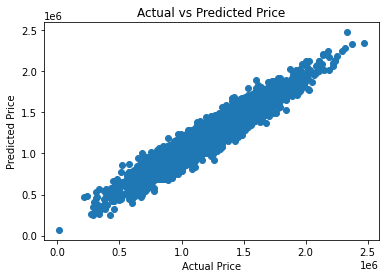

In [68]:
plt.scatter(y_train, lm_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

In [42]:
print("Mean Squared Error : ", mean_squared_error(y_train, lm_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_train, lm_pred))
print("RMSE : ", np.sqrt(mean_absolute_error(y_train, lm_pred)))

Mean Squared Error :  10073035842.946177
Mean Absolute Error:  80787.74574916025
RMSE :  284.2318521016958


RMSE score of this algo is huge because may be data is not linearly seperable.

In [43]:
from sklearn.metrics import r2_score
print("r2_score : ",round((r2_score(y_train, lm_pred)*100),2))

r2_score :  91.81


In [44]:
dc.fit(X_train, y_train)

DecisionTreeRegressor()

In [47]:
dc_pred=dc.predict(X_train)
dc_pred[:5]

array([1489648.01766795, 1183014.50867395, 1547888.6330482 ,
       1186441.75644398, 1340343.85651884])

In [49]:
y_train.to_numpy()[:5]

array([1489648.01766795, 1183014.50867395, 1547888.6330482 ,
       1186441.75644398, 1340343.85651884])

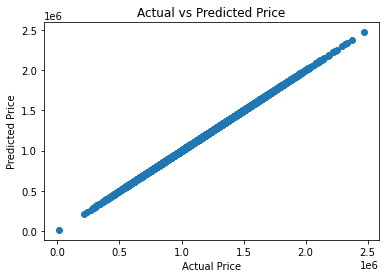

In [50]:
plt.scatter(y_train, dc_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

In [51]:
print("Mean Squared Error : ", mean_squared_error(y_train, dc_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_train, dc_pred))
print("RMSE : ", np.sqrt(mean_absolute_error(y_train, dc_pred)))

Mean Squared Error :  0.0
Mean Absolute Error:  0.0
RMSE :  0.0


##### RMSE score of Decision Tree is 0 because it takes each indtaces of dataset. This is condition of overfitting.

In [53]:
print("R2_score: ",round((r2_score(y_train, dc_pred)*100),2) )

R2_score:  100.0


In [54]:
rand_fores.fit(X_train, y_train)

RandomForestRegressor()

In [55]:
rand_pred=rand_fores.predict(X_train)
rand_pred[:5]

array([1435634.47810498, 1211582.98878271, 1482783.62071595,
       1258678.37608344, 1319297.74251193])

In [56]:
y_train.to_numpy()[:5]

array([1489648.01766795, 1183014.50867395, 1547888.6330482 ,
       1186441.75644398, 1340343.85651884])

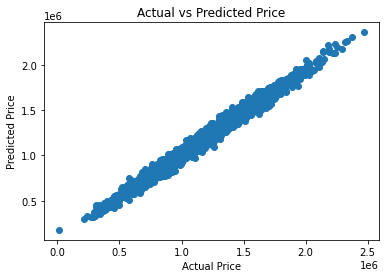

In [57]:
plt.scatter(y_train, rand_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

In [59]:
print("Mean Squared Error : ", mean_squared_error(y_train, rand_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_train, rand_pred))
print("RMSE : ", np.sqrt(mean_absolute_error(y_train, rand_pred)))

Mean Squared Error :  2050064807.190305
Mean Absolute Error:  35494.63135516492
RMSE :  188.40018937136162


In [60]:
print("R2_score: ",round((r2_score(y_train, rand_pred)*100),2))

R2_score:  98.33


# Fine Tune Model

In [63]:
from sklearn.model_selection import cross_val_score
lm_score=cross_val_score(lm,X_train, y_train, scoring="neg_mean_squared_error", cv=10)
dm_score=cross_val_score(dc, X_train,y_train, scoring="neg_mean_squared_error", cv=10)
rand_score=cross_val_score(rand_fores, X_train,y_train, scoring="neg_mean_squared_error", cv=10)
print("Linear Regression rmse_scores: ",np.sqrt(-lm_score))
print("DEcission Tress Regressior rmse_scores: ",np.sqrt(-dm_score))
print("Random Forest Regressior rmse_scores: ",np.sqrt(-rand_score))

Linear Regression rmse_scores:  [101195.50805577  97836.54395736 102448.38075687 102143.90994118
  99611.08159607 104656.2557042  103734.72109034 100002.74044046
 101552.26884665  92242.06208914]
DEcission Tress Regressior rmse_scores:  [178363.89758131 171383.78641668 177114.28931875 189092.61242136
 187485.90705262 162431.74347823 190679.1876837  188337.95098379
 180259.16845617 183937.2246667 ]
Random Forest Regressior rmse_scores:  [114752.76508472 123459.43472122 116537.84610726 126236.74186874
 128022.68670768 120571.78997117 130233.72261148 130496.35606687
 118787.33062838 110329.60373913]


In [64]:
def display_scores(score):
    print("Scores : ", score)
    print("Mean : ", score.mean())
    print("Standard Deviation : ", score.std())

In [65]:
print("Linear Regression")
display_scores(lm_score)

Linear Regression
Scores :  [-1.02405309e+10 -9.57198933e+09 -1.04956707e+10 -1.04333783e+10
 -9.92236758e+09 -1.09529319e+10 -1.07608924e+10 -1.00005481e+10
 -1.03128633e+10 -8.50859802e+09]
Mean :  -10119977045.837412
Standard Deviation :  659229571.1169739


In [122]:
print("Decission Tree")
display_scores(dm_score)

Decission Tree
Scores :  [-3.18136800e+10 -2.93724022e+10 -3.13694715e+10 -3.57560161e+10
 -3.51509653e+10 -2.63840713e+10 -3.63585526e+10 -3.54711838e+10
 -3.24933678e+10 -3.38329026e+10]
Mean :  -32800261321.993713
Standard Deviation :  3019210255.231811


In [67]:
print("Random Forest")
display_scores(rand_score)

Random Forest
Scores :  [-1.31681971e+10 -1.52422320e+10 -1.35810696e+10 -1.59357150e+10
 -1.63898083e+10 -1.45375565e+10 -1.69608225e+10 -1.70292989e+10
 -1.41104299e+10 -1.21726215e+10]
Mean :  -14912775136.895573
Standard Deviation :  1584951958.9318228


From above we can anlyze that Linear regression peform better than Random Forest and Decision Tree. Decision Tree perform worse than Linear Regression so the model is overfitting very badly.

## Hyperparameter Tuning

In [70]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [109]:
param={'n_estimators': randint(low=1, high=200),
      'max_features' : randint(low=1, high=8)}
#lr_reg=LinearRegression(random_state=42)
#dc_reg=DecisionTreeRegressor(random_state=42)
rand_reg=RandomForestRegressor(random_state=42)

#dc_rand_search=RandomizedSearchCV(dc, param_distributions=param, n_iter=10,cv=5, scoring="neg_mean_squared_error", random_state=42)    
for_rand_search=RandomizedSearchCV(rand_fores, param_distributions=param, n_iter=10, cv=5, scoring="neg_mean_squared_error", random_state=42)
#lr_rand_search.fit(X_train, y_train)

for_rand_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000266F20F6B20>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000266F24E69D0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [110]:
print("Random Forest: ")
curves=for_rand_search.cv_results_
for mean_score, params in zip(curves['mean_test_score'], curves['params']):
    print(np.sqrt(-mean_score), params)

Random Forest: 
nan {'max_features': 7, 'n_estimators': 180}
127535.38139397881 {'max_features': 5, 'n_estimators': 15}
122991.27230043239 {'max_features': 3, 'n_estimators': 72}
125556.80486200261 {'max_features': 5, 'n_estimators': 21}
nan {'max_features': 7, 'n_estimators': 122}
122727.57854309716 {'max_features': 3, 'n_estimators': 75}
122136.49498082104 {'max_features': 3, 'n_estimators': 88}
122687.4750829903 {'max_features': 5, 'n_estimators': 100}
121743.04322286378 {'max_features': 3, 'n_estimators': 150}
157827.44077355656 {'max_features': 5, 'n_estimators': 2}


In [113]:
print("Decision Tree")

dc_reg=DecisionTreeRegressor()
max_depth=[1,2,3,4,5,6,7,8,9,10]
for val in max_depth:
    dc_rand_search=RandomizedSearchCV(DecisionTreeRegressor(max_depth=val, random_state=42),param_distributions=param,cv=5, scoring="neg_mean_squared_error")
   
    print(f"For max depth: {val} ")
    print("rmse",score.mean())
    

Decision Tree
For max depth: 1 
rmse -10119977045.837412
For max depth: 2 
rmse -10119977045.837412
For max depth: 3 
rmse -10119977045.837412
For max depth: 4 
rmse -10119977045.837412
For max depth: 5 
rmse -10119977045.837412
For max depth: 6 
rmse -10119977045.837412
For max depth: 7 
rmse -10119977045.837412
For max depth: 8 
rmse -10119977045.837412
For max depth: 9 
rmse -10119977045.837412
For max depth: 10 
rmse -10119977045.837412


In [134]:
def error(y, y_hat):
    mse = ((y - y_hat)**2).sum() / len(y)
    return np.sqrt(mse)

In [123]:
from sklearn.linear_model import SGDRegressor

In [128]:
sgd=SGDRegressor(loss="squared_loss", penalty="l2")

In [129]:
sgd.fit(X_train,y_train)

SGDRegressor()

In [131]:
pred=sgd.predict(X_train)
pred

array([ 5.28441462e+17,  9.41078828e+17,  6.90288547e+17, ...,
       -5.22431534e+16,  6.43365280e+17,  4.55878868e+17])

In [138]:
er=error(y_train.ravel(),pred)
er

7.406890692968676e+17

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [139]:
# print the intercept
print(lm.intercept_)

-2640159.796851911


In [140]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80 **.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15 **.

Does this make sense? Probably not because I made up this data. If you want real data to repeat this sort of analysis, check out the [boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html):



    from sklearn.datasets import load_boston
    boston = load_boston()
    print(boston.DESCR)
    boston_df = boston.data

## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [141]:
predictions = lm.predict(X_test)

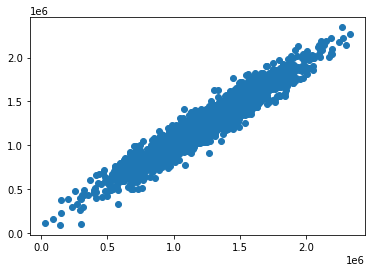

In [142]:
plt.scatter(y_test,predictions)

**Residual Histogram**

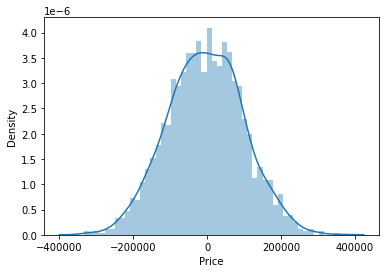

In [143]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [144]:
from sklearn import metrics

In [145]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914954
MSE: 10460958907.209503
RMSE: 102278.82922291153


In [147]:
print("R2 Score:", round((r2_score(y_test, predictions)*100),2))

R2 Score: 91.77
